In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import metrics

from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
column = ['classes','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-s-a-r','stalk-s-b-r','stalk-c-a-r','stalk-c-b-r','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
# Load data
df = pd.read_csv('agaricus-lepiota.data', names = column)

In [ ]:
df.head()

classes cap-shape cap-surface cap-color bruises odor gill-attachment  \
0       p         x           s         n       t    p               f   
1       e         x           s         y       t    a               f   
2       e         b           s         w       t    l               f   
3       p         x           y         w       t    p               f   
4       e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-s-b-r stalk-c-a-r stalk-c-b-r  \
0            c         n          k  ...           s           w           w   
1            c         b          k  ...           s           w           w   
2            c         b          n  ...           s           w           w   
3            c         n          n  ...           s           w           w   
4            w         b          k  ...           s           w           w   

  veil-type veil-color ring-number ring-type spore-print-color population  \
0         p          w           o         p                 k          s   
1         p          w           o         p                 n          n   
2         p          w           o         p                 n          n   
3         p          w           o         p                 k          s   
4         p          w           o         e                 n          a   

  habitat  
0       u  
1       g  
2       m  
3       u  
4       g  

[5 rows x 23 columns]

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.dtypes

classes              object
cap-shape            object
cap-surface          object
cap-color            object
bruises              object
odor                 object
gill-attachment      object
gill-spacing         object
gill-size            object
gill-color           object
stalk-shape          object
stalk-root           object
stalk-s-a-r          object
stalk-s-b-r          object
stalk-c-a-r          object
stalk-c-b-r          object
veil-type            object
veil-color           object
ring-number          object
ring-type            object
spore-print-color    object
population           object
habitat              object
dtype: object

In [ ]:
#df.isnull().sum()

In [ ]:
df.replace('?', np.nan, inplace = True)

In [ ]:
df.isnull().sum()

classes                 0
cap-shape               0
cap-surface             0
cap-color               0
bruises                 0
odor                    0
gill-attachment         0
gill-spacing            0
gill-size               0
gill-color              0
stalk-shape             0
stalk-root           2480
stalk-s-a-r             0
stalk-s-b-r             0
stalk-c-a-r             0
stalk-c-b-r             0
veil-type               0
veil-color              0
ring-number             0
ring-type               0
spore-print-color       0
population              0
habitat                 0
dtype: int64

###Handling Missing value

In [ ]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['stalk-root']])
df[['stalk-root']] = imputer.transform(df[['stalk-root']])

In [ ]:
df.isnull().sum()

classes              0
cap-shape            0
cap-surface          0
cap-color            0
bruises              0
odor                 0
gill-attachment      0
gill-spacing         0
gill-size            0
gill-color           0
stalk-shape          0
stalk-root           0
stalk-s-a-r          0
stalk-s-b-r          0
stalk-c-a-r          0
stalk-c-b-r          0
veil-type            0
veil-color           0
ring-number          0
ring-type            0
spore-print-color    0
population           0
habitat              0
dtype: int64

##  Encoding Categorical Data

In [ ]:
enc = OrdinalEncoder()
enc_categorical = enc.fit_transform(df)
categoricaldf = pd.DataFrame(enc_categorical, columns = column)
categoricaldf.head()

classes  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1.0        5.0          2.0        4.0      1.0   6.0              1.0   
1      0.0        5.0          2.0        9.0      1.0   0.0              1.0   
2      0.0        0.0          2.0        8.0      1.0   3.0              1.0   
3      1.0        5.0          3.0        8.0      1.0   6.0              1.0   
4      0.0        5.0          2.0        3.0      0.0   5.0              1.0   

   gill-spacing  gill-size  gill-color  ...  stalk-s-b-r  stalk-c-a-r  \
0           0.0        1.0         4.0  ...          2.0          7.0   
1           0.0        0.0         4.0  ...          2.0          7.0   
2           0.0        0.0         5.0  ...          2.0          7.0   
3           0.0        1.0         5.0  ...          2.0          7.0   
4           1.0        0.0         4.0  ...          2.0          7.0   

   stalk-c-b-r  veil-type  veil-color  ring-number  ring-type  \
0          7.0        0.0         2.0          1.0        4.0   
1          7.0        0.0         2.0          1.0        4.0   
2          7.0        0.0         2.0          1.0        4.0   
3          7.0        0.0         2.0          1.0        4.0   
4          7.0        0.0         2.0          1.0        0.0   

   spore-print-color  population  habitat  
0                2.0         3.0      5.0  
1                3.0         2.0      1.0  
2                3.0         2.0      3.0  
3                2.0         3.0      5.0  
4                3.0         0.0      1.0  

[5 rows x 23 columns]

##Train test split

In [ ]:
y = categoricaldf['classes']
X = categoricaldf.drop('classes', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify= y) 

In [ ]:
X_train.shape

(6499, 22)

In [ ]:
X_test.shape

(1625, 22)

##Implementation of ML Algorithms

1.   List item
2.   List item



###Logistic regression

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
 y_pred_lr = lr.predict(X_test)

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[807,  35],
       [ 42, 741]])

In [ ]:
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
acc_lr

0.9526153846153846

Text(33.0, 0.5, 'Truth')

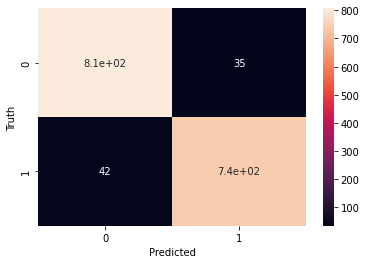

In [ ]:
sns.heatmap(data=confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       842
         1.0       0.95      0.95      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



##KNN

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)  
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model_knn.predict(X_test)  

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_knn) 

In [ ]:
print(accuracy_score(y_test, y_pred_knn)) 

0.9987692307692307


Text(33.0, 0.5, 'Truth')

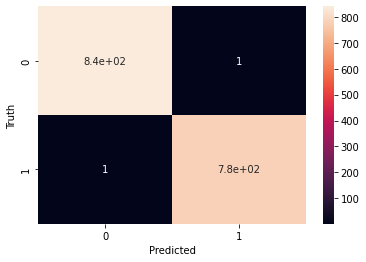

In [ ]:
sns.heatmap(data=cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       842
         1.0       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



##Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt_model = dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
cmm = metrics.confusion_matrix(y_test, y_pred_dt)

Text(33.0, 0.5, 'Truth')

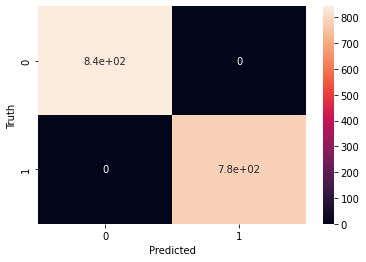

In [ ]:
sns.heatmap(data=cmm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(accuracy_score(y_test, y_pred_dt)) 

1.0


In [ ]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       842
         1.0       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

